In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.linear_model import Lasso
from statsmodels.tsa.seasonal import seasonal_decompose

import functions 

In [2]:
df = pd.DataFrame(
    [0.4, 0.6, 0.3, 0.2, 0.4, 0.5, 0.2, 0.1, 0.4, 0.4, 0, 0.2, -0.2, -2.8, 0.9],
    index=['2017-Q1', '2017-Q2', '2017-Q3', '2017-Q4', '2018-Q1', '2018-Q2', '2018-Q3', '2018-Q4', '2019-Q1', '2019-Q2', '2019-Q3', '2019-Q4', '2020-Q1', '2020-Q2', '2020-Q3'],
    columns=['Percentage change on previous period'])
df

,Percentage change on previous period
2017-Q1,0.4
2017-Q2,0.6
2017-Q3,0.3
2017-Q4,0.2
2018-Q1,0.4
2018-Q2,0.5
2018-Q3,0.2
2018-Q4,0.1
2019-Q1,0.4
2019-Q2,0.4


In [3]:
df.describe()

,Percentage change on previous period
count,15.000000
mean,0.106667
std,0.844703
min,-2.800000
25%,0.150000
50%,0.300000
75%,0.400000
max,0.900000


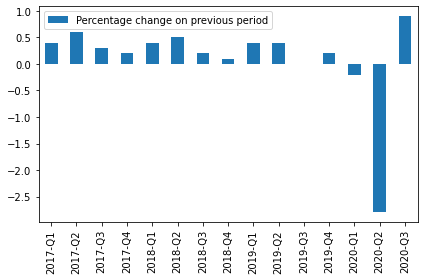

In [4]:
df.plot.bar()
plt.tight_layout()
plt.show()

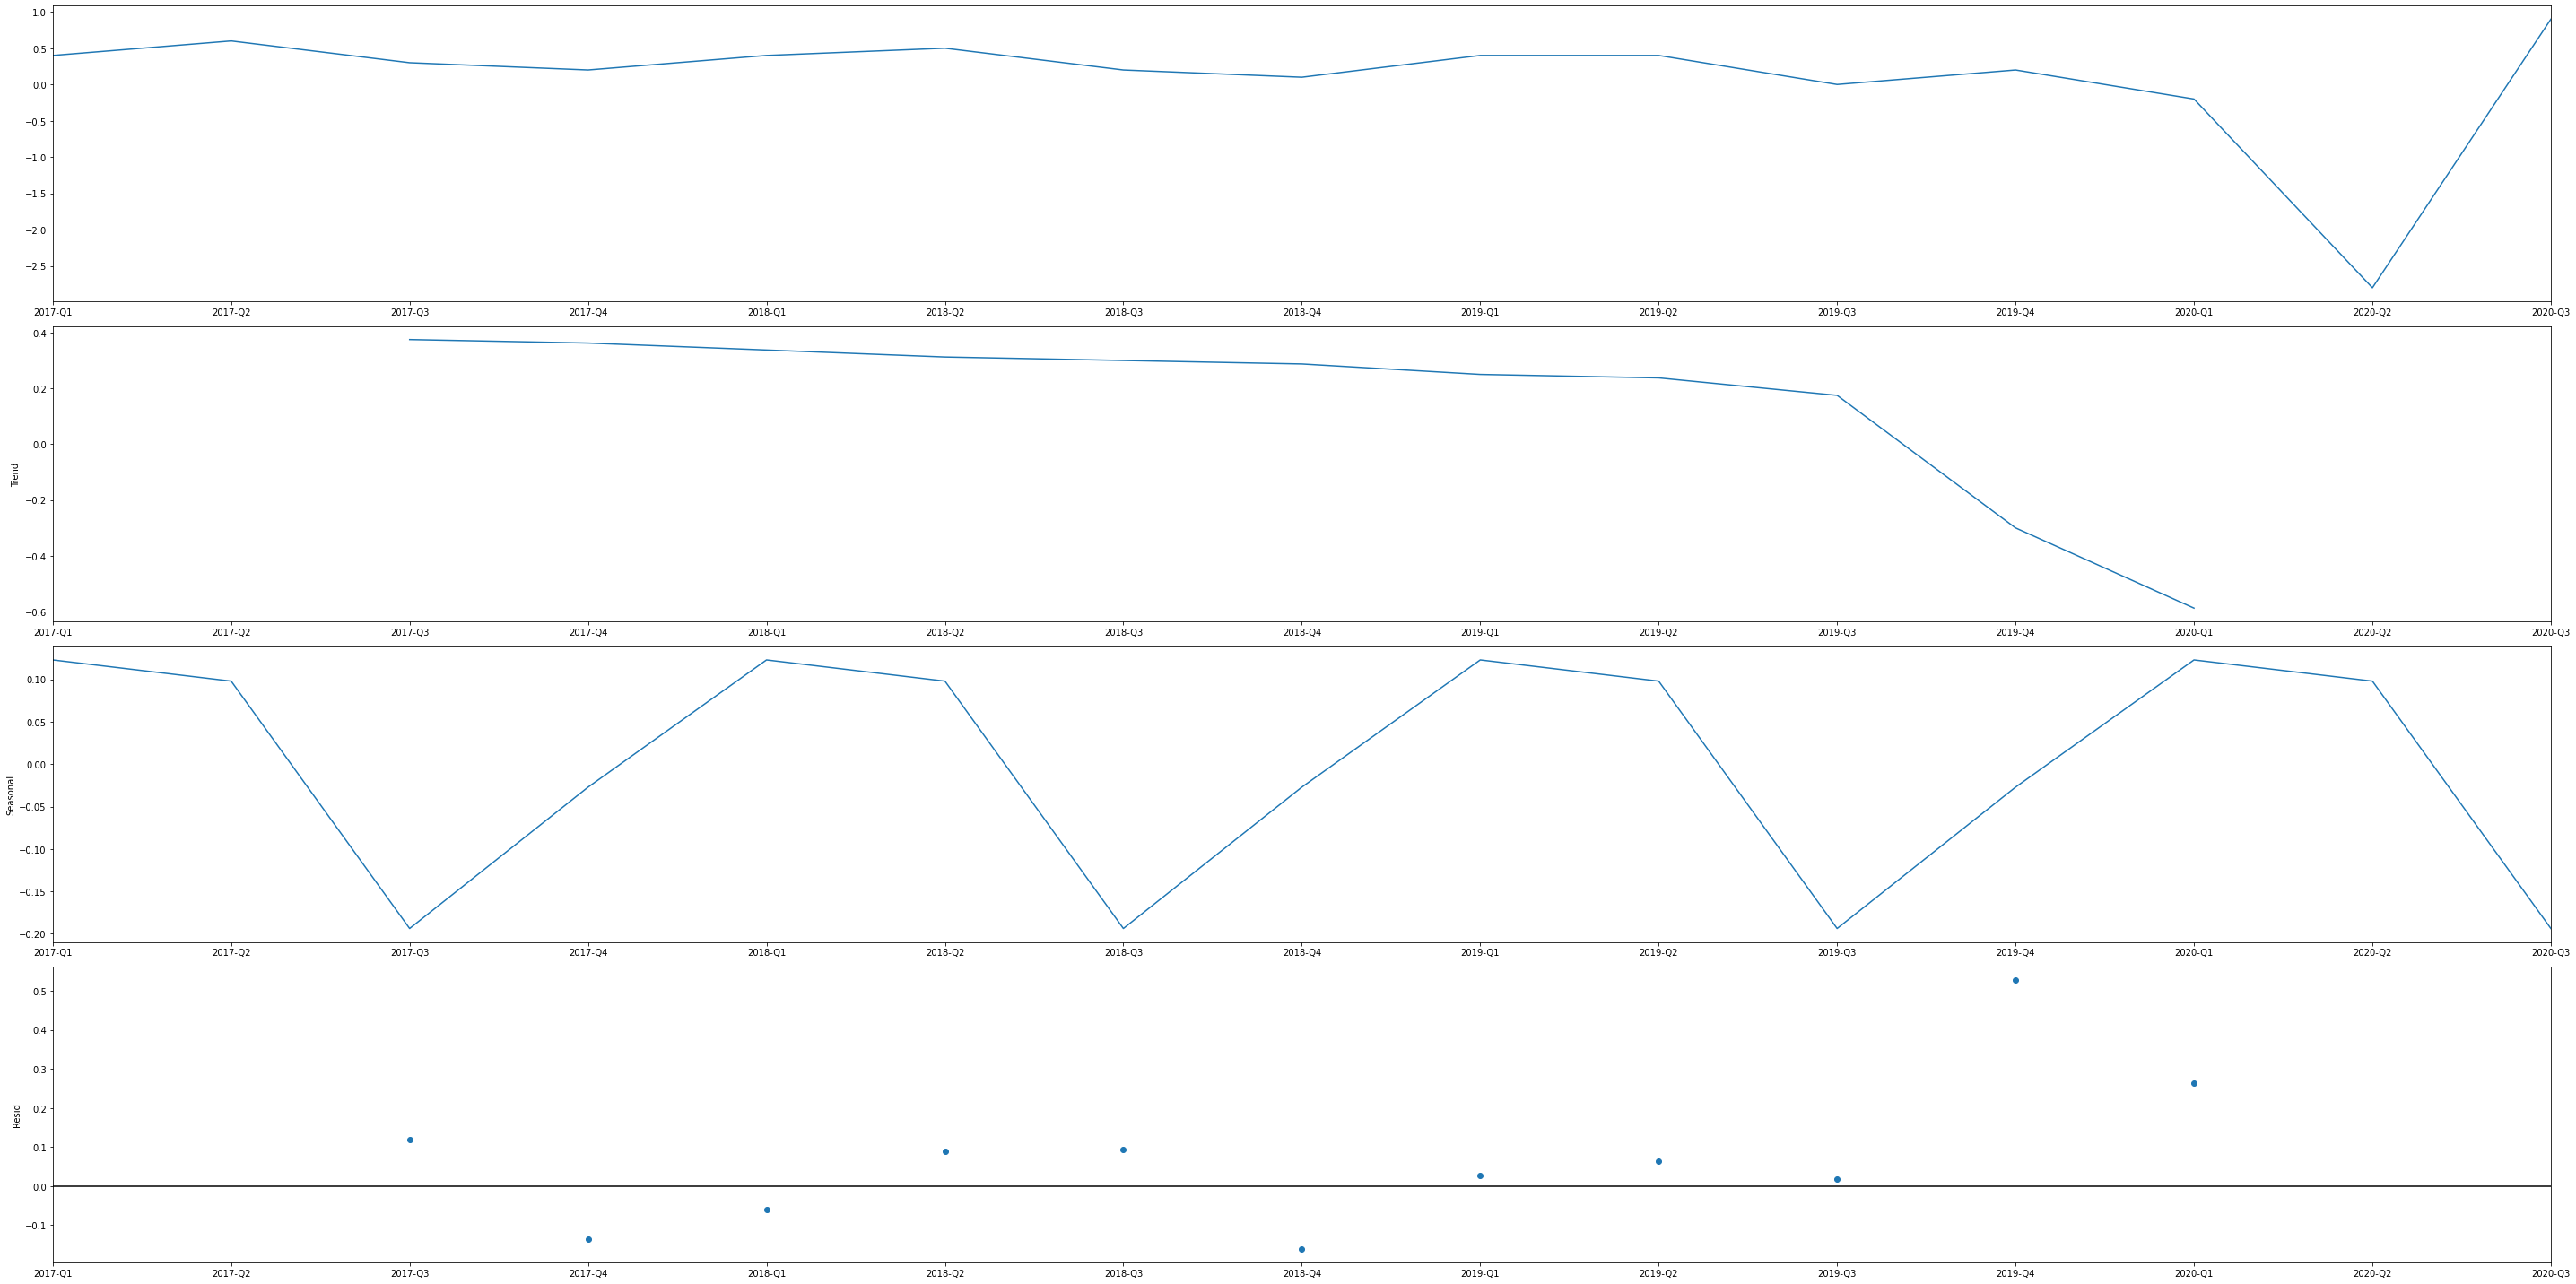

In [5]:
fig = seasonal_decompose(df, model='additive', freq=4).plot()
fig.set_figheight(20)
fig.set_figwidth(40)
plt.tight_layout()

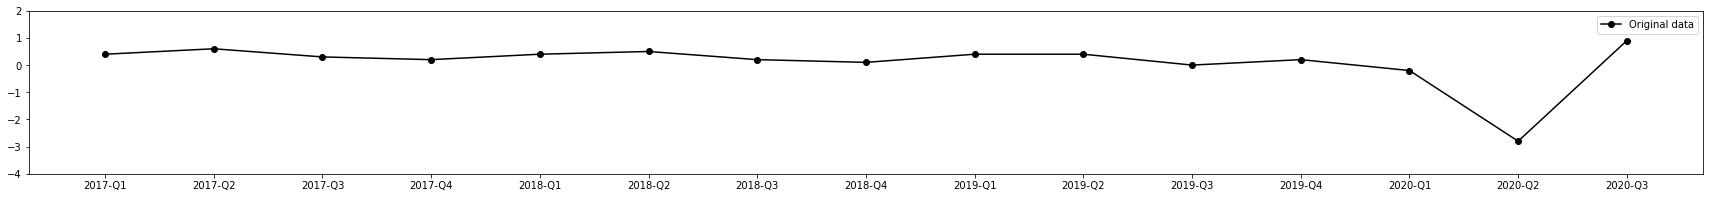

In [6]:
functions.multiple_plots(
    df['Percentage change on previous period'], 
    fits=None, 
    forecasts=None,
    colours=None, 
    labels=None
)

In [7]:
df = df.reset_index(drop=False)
index = df['index'].str[-1].astype(int)
for i in range(1, 5):
    df[f'is_q{i}'] = (index == i).astype(int)
for i in range(1, 5):
    df[f'shift_{i}'] = df['Percentage change on previous period'].shift(i)
df = df.iloc[4:].reset_index(drop=True).reset_index(drop=False).drop(columns=['index']).rename(columns={'level_0': 'index'})

In [8]:
df

,index,Percentage change on previous period,is_q1,is_q2,is_q3,is_q4,shift_1,shift_2,shift_3,shift_4
0,0,0.4,1,0,0,0,0.2,0.3,0.6,0.4
1,1,0.5,0,1,0,0,0.4,0.2,0.3,0.6
2,2,0.2,0,0,1,0,0.5,0.4,0.2,0.3
3,3,0.1,0,0,0,1,0.2,0.5,0.4,0.2
4,4,0.4,1,0,0,0,0.1,0.2,0.5,0.4
5,5,0.4,0,1,0,0,0.4,0.1,0.2,0.5
6,6,0.0,0,0,1,0,0.4,0.4,0.1,0.2
7,7,0.2,0,0,0,1,0.0,0.4,0.4,0.1
8,8,-0.2,1,0,0,0,0.2,0.0,0.4,0.4
9,9,-2.8,0,1,0,0,-0.2,0.2,0.0,0.4


In [9]:
regressor = Lasso(alpha=0.1)
regressor.fit(
    df.drop(columns=['Percentage change on previous period']),
    df['Percentage change on previous period']
)
pred = regressor.predict(df.drop(columns=['Percentage change on previous period']))

In [10]:
df['Percentage change on previous period'].values[-1]

0.9

In [11]:
regressor.predict([[11, 0, 0, 0, 1, 0.9, -2.8, -0.2, 0.2]])[0]

-1.1940724068276571

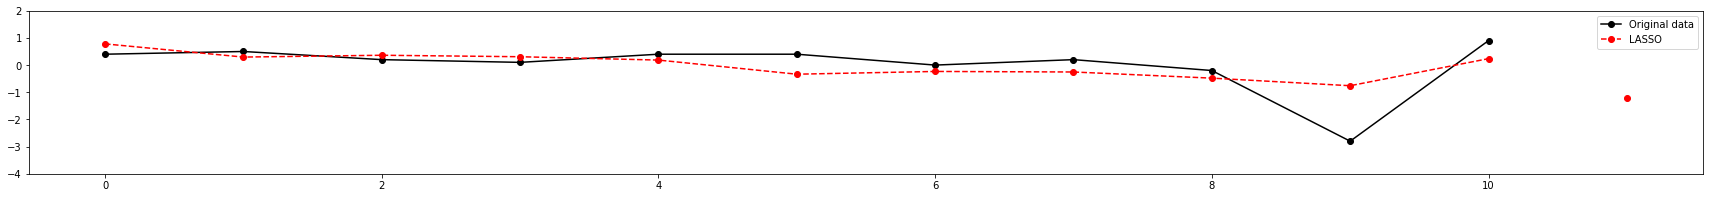

In [12]:
functions.multiple_plots(
    df['Percentage change on previous period'], 
    fits=[list(pred)], 
    forecasts=[pd.DataFrame(index=[11], data=[-1.1940724068276571])],
    colours=['red'], 
    labels=['LASSO']
)

### Validation

In [13]:
# tbd